In [ ]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
cd /content/drive/MyDrive/AiData

/content/drive/MyDrive/AiData


In [ ]:
!pip install treelib

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import mode
from collections import  Counter, OrderedDict
import treelib
from treelib import Tree, Node

In [ ]:
Data = pd.read_csv('coursework2.csv')
print(Data)

     instant      dteday  season  yr  ...  windspeed  casual  registered  count
0          1  01/01/2011       1   0  ...       0.16     331         654    985
1          2  02/01/2011       1   0  ...       0.25     131         670    801
2          3  03/01/2011       1   0  ...       0.25     120        1229   1349
3          4  04/01/2011       1   0  ...       0.16     108        1454   1562
4          5  05/01/2011       1   0  ...       0.19      82        1518   1600
..       ...         ...     ...  ..  ...        ...     ...         ...    ...
726      727  27/12/2012       1   1  ...       0.35     247        1867   2114
727      728  28/12/2012       1   1  ...       0.16     644        2451   3095
728      729  29/12/2012       1   1  ...       0.12     159        1182   1341
729      730  30/12/2012       1   1  ...       0.35     364        1432   1796
730      731  31/12/2012       1   1  ...       0.15     439        2290   2729

[731 rows x 16 columns]


In [ ]:
df = pd.DataFrame(Data)
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
0,1,01/01/2011,1,0,1,0,6,0,2,14.11,18.18,0.81,0.16,331,654,985
1,2,02/01/2011,1,0,1,0,0,0,2,14.90,17.69,0.70,0.25,131,670,801
2,3,03/01/2011,1,0,1,0,1,1,1,8.05,9.47,0.44,0.25,120,1229,1349
3,4,04/01/2011,1,0,1,0,2,1,1,8.20,10.61,0.59,0.16,108,1454,1562
4,5,05/01/2011,1,0,1,0,3,1,1,9.31,11.46,0.44,0.19,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,27/12/2012,1,1,12,0,4,1,2,10.42,11.33,0.65,0.35,247,1867,2114
727,728,28/12/2012,1,1,12,0,5,1,2,10.39,12.75,0.59,0.16,644,2451,3095
728,729,29/12/2012,1,1,12,0,6,0,2,10.39,12.12,0.75,0.12,159,1182,1341
729,730,30/12/2012,1,1,12,0,0,0,1,10.49,11.58,0.48,0.35,364,1432,1796


In [ ]:
data = Data.values
print(data.shape)

(731, 16)


In [ ]:
count_data = data[:, 15]
print(count_data.min(), count_data.max())
print((22+8714-22)/3,2*(22+8714-22)/3 )

22 8714
2904.6666666666665 5809.333333333333


[22.0 2919.3333333333335 5816.666666666667 8714.0]


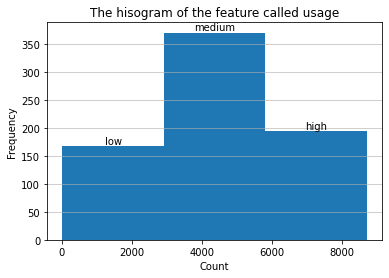

In [ ]:
counts, bins = np.histogram(count_data, bins = 3)
plt.hist(bins[:-1], bins, weights=counts)
plt.text((bins[0]+bins[1])/2 + 1, counts[0]+1,'low', ha='center',va='bottom')
plt.text((bins[1]+bins[2])/2 + 1, counts[1]+1,'medium', ha='center',va='bottom')
plt.text((bins[2]+bins[3])/2 + 1, counts[2]+1,'high', ha='center',va='bottom')
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.title('The hisogram of the feature called usage')
print(bins)
plt.savefig('/content/drive/MyDrive/histogramUsage.png')

In [ ]:
usage = []
for i, c in enumerate(count_data):
  if count_data[i]>=bins[0] and count_data[i]<bins[1]:
    usage.append(0)
  elif count_data[i]>=bins[1] and count_data[i]<bins[2]:
    usage.append(1)
  else:
    usage.append(2)
print(usage)
usage = np.array(usage).reshape(-1, 1)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 

In [ ]:
# new_data = np.hstack((data[:,0:15], usage))
new_data = np.hstack((data[:,2].reshape(-1,1),data[:,7].reshape(-1,1),  data[:,8].reshape(-1,1), usage.reshape(-1,1)))

In [ ]:
features = ['season','workingday', 'weathersit', 'usage']
new_df = pd.DataFrame(new_data, columns=features)
new_df

,season,workingday,weathersit,usage
0,1,0,2,0
1,1,0,2,0
2,1,1,1,0
3,1,1,1,0
4,1,1,1,0
...,...,...,...,...
726,1,1,2,0
727,1,1,2,1
728,1,0,2,0
729,1,0,1,0


In [ ]:
temps = data[:, 9]
tempbins_name = ['low', 'medium', 'hight']
tempbins = []
for j, temp in enumerate(temps):
  if temp < 12:
    tempbins.append(0)
  elif temp >=12 and temp < 24:
    tempbins.append(1)
  else:
    tempbins.append(2)
tempbins = np.array(tempbins)

In [ ]:
new_data_temp = np.hstack((data[:,2].reshape(-1,1),data[:,7].reshape(-1,1),  data[:,8].reshape(-1,1), 
                           tempbins.reshape(-1,1), usage.reshape(-1,1)))
new_data_temp

array([[1, 0, 2, 1, 0],
       [1, 0, 2, 1, 0],
       [1, 1, 1, 0, 0],
       ...,
       [1, 0, 2, 0, 0],
       [1, 0, 1, 0, 0],
       [1, 1, 2, 0, 0]], dtype=object)

In [ ]:
features_temp = ['season','workingday', 'weathersit', 'tempbins','usage']
new_df_temp = pd.DataFrame(new_data_temp, columns=features_temp)
new_df_temp

,season,workingday,weathersit,tempbins,usage
0,1,0,2,1,0
1,1,0,2,1,0
2,1,1,1,0,0
3,1,1,1,0,0
4,1,1,1,0,0
...,...,...,...,...,...
726,1,1,2,0,0
727,1,1,2,0,1
728,1,0,2,0,0
729,1,0,1,0,0


In [ ]:
c_season = Counter(new_data[:, 0]).items()
c_workingday = Counter(new_data[:, 1]).items()
c_weathersit = Counter(new_data[:, 2]).items()
c_tempbins = Counter(new_data[:, 3]).items()
print('counter season:', c_season)
print('counter workinday:', c_workingday)
print('counter weathersit:', c_weathersit)
print('counter tempbins:', c_tempbins)

counter season: dict_items([(1, 181), (2, 184), (3, 188), (4, 178)])
counter workinday: dict_items([(0, 231), (1, 500)])
counter weathersit: dict_items([(2, 247), (1, 463), (3, 21)])
counter tempbins: dict_items([(0, 167), (1, 370), (2, 194)])


In [ ]:
c_season = np.array(list(c_season))[:, 1]
c_workingday = np.array(list(c_workingday))[:, 1]
c_weathersit = np.array(list(c_weathersit))[:, 1]
print('counter season:', c_season)
print('counter workinday:', c_workingday)
print('counter weathersit:', c_weathersit)

counter season: [181 184 188 178]
counter workinday: [231 500]
counter weathersit: [247 463  21]


In [ ]:
FeatureName = np.array(['season', 'workingday', 'weathersit', 'usage'])
FeaturesNameTemp = np.array(['season','workingday', 'weathersit', 'tempbins','usage'])

In [ ]:
def ToDict(data, FeatureName):
    DataDict = dict()
    for num, name in enumerate(FeatureName):
      DataDict[name] = data[:, num]

    return DataDict

In [ ]:
def ClassDist(DataDict):
    tree = dict()
    for name in DataDict.keys():
      tree[name] = {}
      items = np.array(list((Counter(DataDict[name]).items())))
      p = items[:,1]/items[:,1].sum()
      for num, item in enumerate(items):

        if name != 'usage':
          SeperatedIdx = np.where(DataDict[name] == item[0])[0]
          # SeperatedData = DataDict['usage'][SeperatedIdx]
          tree[name][str(item[0])] = [item[1], p[num], SeperatedIdx]
        else:
          tree[name][str(item[0])] = [item[1], p[num]]
    return tree

In [ ]:
def Entropy(Dict, FeatureName):
  H = 0
  for key, value in Dict[FeatureName].items():
      H = H - value[1] * np.log2(value[1])  #calculating entropy
  return H

In [ ]:
def GainAndDict(DataDict): #get a dictionary with distribution, index, gain and entropy for each feature
    Parent = ClassDist(DataDict)  #get the distribution for each feature
    children_usage = dict()   # create dictionary for children node
    for key1 in Parent.keys():  # iteration of the feature
      if key1 != 'usage':
        children_usage[key1] = {} # create the node for each feature season, workingday and weatherset
        rem = 0
        for key2 in Parent[key1].keys():  #get the children node in each feature
            idx = np.where(DataDict[key1]==int(key2)) # find the index of each child in each feature
            divide = DataDict['usage'][idx].reshape(-1,1) #extract the usage data using the index of each child
            todict = ToDict(divide, ['usage']) # transfrom into dictionary
            dist = ClassDist(todict) # get the distribution of the usage data of each child node
            H = Entropy(dist, 'usage')  # get the entropy for each child node
            children_usage[key1][key2] = dist #transfrom the data into dictionary
            children_usage[key1][key2]['index'] = Parent[key1][key2][2]
            children_usage[key1][key2]['H'] = H
            rem = rem + H * Parent[key1][key2][1] #get the reminder
        gain = Entropy(Parent, 'usage') - rem      #get the gain
        children_usage[key1]['gain'] = gain
    return children_usage

In [ ]:
def FindFeatureAndSubDict(DataDict):
    updated_dict = GainAndDict(DataDict)#get a dictionary with distribution, index, gain and entropy for each feature
    max_gain = 0 #initialize the maximal gain
    sub_dict = dict() #create subdictionary
    H = dict()
    G = dict()
    for key in updated_dict.keys():  # iterate the feature
        gain = updated_dict[key]['gain'] #get the gain
        max_gain = max(max_gain, gain) #find the maximal gain
        G[key] = gain
    find = list(filter(lambda k: updated_dict[k]['gain'] == max_gain, updated_dict))[0] #inverse index to find the feature name
    key_len = 0
    for k in updated_dict[find].keys():
      if k != 'gain':
        key_len = key_len + 1
    sub_dict[find] = {} #create dictionary with parent node the best feature found
    
    for key1 in updated_dict[find].keys(): #iterate the children of the features
      if key1 != 'gain': #do not include the gain
        sub_dict[find][key1] = {} #create the children of the features in subdictionary
        idx = updated_dict[find][key1]['index'] #get the index of the child node for best feature found
        H[key1] = updated_dict[find][key1]['H']
        for key2 in updated_dict.keys(): # iterate the feature
            if key2 != find and key_len>1: #do not include the best feature found
              # idx = updated_dict[find][key1]['index'] #get the index of the child node for best feature found
              sub_dict[find][key1][key2] = DataDict[key2][idx] #insert the data into the subdictionary
              sub_dict[find][key1]['usage'] = DataDict['usage'][idx] 
            else:
              sub_dict[find][key1]['usage'] = DataDict['usage'][idx] 
    return find, sub_dict, H, G

In [ ]:
def BuildTree(tree, DataDict, iter, NumFeatures):
  usage_name = ['low', 'medium', 'high']
  feature, sub_dict, H, G = FindFeatureAndSubDict(DataDict)
  tree[feature] = {}
  # print(feature)
  for key, value in sub_dict[feature].items():
    tree[feature][key] = {}
    if H[key] == 0:
      cls = mode(value['usage'])[0][0]
      cls_counts = ClassDist(value)['usage']
      tree[feature][key]['usage'] = {} 
      tree[feature][key]['usage'][usage_name[cls]] = cls_counts
      # if iter < NumFeatures:
      #   BuildTree(tree[feature][key], sub_dict[feature][key], iter+1, NumFeatures)

    elif H[key] != 0:

      if iter < NumFeatures:
         BuildTree(tree[feature][key], sub_dict[feature][key], iter+1, NumFeatures)
      else:
        cls = mode(value['usage'])[0][0]
        # print(cls)
        cls_counts = ClassDist(value)['usage']
        tree[feature][key]['usage'] = {} 
        tree[feature][key]['usage'][usage_name[cls]] = cls_counts
        
        # return BuildTree(tree[feature][key], sub_dict[feature][key], iter+1, NumFeatures)

In [ ]:
def PlotTree(Dict, tree, iter, NumberFeature, names):
  if names == {}:
    tree.create_node('Root', 'root');
    names['i'] = 0
  for child in Dict.keys():
    for node in Dict[child].keys():
      if child != 'usage':
        names['i'] = names['i'] + 1
        names['C'+str(iter)] = 'child'+ str(names['i'])
        names['N'+str(iter)] = child+' '+'='+' '+node
        if iter == 1:
          # print(iter, names['i'], names['N'+str(iter)], names['C'+str(iter)])
          tree.create_node(names['N'+str(iter)], names['C'+str(iter)], parent = 'root');
        else:
          # print(iter, names['i'], names['N'+str(iter)], names['C'+str(iter)], names['C'+str(iter-1)])
          tree.create_node(names['N'+str(iter)], names['C'+str(iter)], parent = names['C'+str(iter-1)]);
        if iter <= NumberFeature:
            PlotTree(Dict[child][node], tree, iter+1, NumberFeature, names)
      else:
        names['i'] = names['i'] + 1
        names['C'+str(iter)] = 'child'+ str(names['i'])
        names['N'+str(iter)] = child+' '+'='+' '+node
        # print(iter, names['i'], names['N'+str(iter)], names['C'+str(iter)], names['C'+str(iter-1)])
        tree.create_node(names['N'+str(iter)], names['C'+str(iter)], parent = names['C'+str(iter-1)]);

In [ ]:
class Nodex(object): 
    def __init__(self, num): 
      self.num = num

In [ ]:
TREE = dict()
DataDict = ToDict(new_data, FeatureName)
BuildTree(TREE, DataDict, 1, 3)

In [ ]:
TREE

{'season': {'1': {'workingday': {'0': {'weathersit': {'1': {'usage': {'low': {'0': [30,
          0.7317073170731707],
         '1': [11, 0.2682926829268293]}}},
      '2': {'usage': {'low': {'0': [15, 0.7894736842105263],
         '1': [2, 0.10526315789473684],
         '2': [2, 0.10526315789473684]}}},
      '3': {'usage': {'low': {'0': [1, 1.0]}}}}},
    '1': {'weathersit': {'1': {'usage': {'low': {'0': [33, 0.4714285714285714],
         '1': [32, 0.45714285714285713],
         '2': [5, 0.07142857142857142]}}},
      '2': {'usage': {'low': {'0': [31, 0.6595744680851063],
         '1': [16, 0.3404255319148936]}}},
      '3': {'usage': {'low': {'0': [3, 1.0]}}}}}}},
  '2': {'weathersit': {'1': {'workingday': {'0': {'usage': {'high': {'0': [1,
          0.027777777777777776],
         '1': [16, 0.4444444444444444],
         '2': [19, 0.5277777777777778]}}},
      '1': {'usage': {'medium': {'0': [5, 0.06493506493506493],
         '1': [39, 0.5064935064935064],
         '2': [33, 0.42857

In [ ]:
DT = Tree()
NameDict= dict()
PlotTree(TREE, DT, 1, 3, NameDict)
DT.show()
DT.save2file('/content/drive/MyDrive/tree0505')

Root
├── season = 1
│   ├── workingday = 0
│   │   ├── weathersit = 1
│   │   │   └── usage = low
│   │   ├── weathersit = 2
│   │   │   └── usage = low
│   │   └── weathersit = 3
│   │       └── usage = low
│   └── workingday = 1
│       ├── weathersit = 1
│       │   └── usage = low
│       ├── weathersit = 2
│       │   └── usage = low
│       └── weathersit = 3
│           └── usage = low
├── season = 2
│   ├── weathersit = 1
│   │   ├── workingday = 0
│   │   │   └── usage = high
│   │   └── workingday = 1
│   │       └── usage = medium
│   ├── weathersit = 2
│   │   ├── workingday = 0
│   │   │   └── usage = medium
│   │   └── workingday = 1
│   │       └── usage = medium
│   └── weathersit = 3
│       └── usage = low
├── season = 3
│   ├── weathersit = 1
│   │   ├── workingday = 0
│   │   │   └── usage = medium
│   │   └── workingday = 1
│   │       └── usage = high
│   ├── weathersit = 2
│   │   ├── workingday = 0
│   │   │   └── usage = medium
│   │   └── workingday = 1
│   │ 

In [ ]:
prune_example_data = TREE['season']['1']['workingday']['0']['weathersit']
for pk, pv in prune_example_data.items():
  print(pk, pv['usage'])

2 {'low': {'0': [15, 0.7894736842105263], '1': [2, 0.10526315789473684], '2': [2, 0.10526315789473684]}}
1 {'low': {'0': [30, 0.7317073170731707], '1': [11, 0.2682926829268293]}}
3 {'low': {'0': [1, 1.0]}}


In [ ]:
def mcp(k, c):
  return (k-c+1)/(k+2)

In [ ]:
p = np.array([[30, 11, 0], [15, 2, 2], [1, 0, 0]])
p_max = []
for p_item in p:
  p_max.append(p_item.max())
all_p = p.sum()
p_row = p.sum(axis=1)
weight = p_row/all_p
print(p_row)
print(p_max)
MCP = mcp(p_row, p_max)
print(MCP)
BackUpError = (weight*MCP).sum()
ParentMcp = mcp(61, 46)
print(ParentMcp)
print(BackUpError)
print(ParentMcp<BackUpError)

[41 19  1]
[30, 15, 1]
[0.27906977 0.23809524 0.33333333]
0.25396825396825395
0.26719677577473994
True


In [ ]:
DataDictTemp = ToDict(new_data_temp, FeaturesNameTemp)
feature_temp, sub_dict_temp, H_temp, G_temp = FindFeatureAndSubDict(DataDictTemp)
print(feature_temp)
print(H_temp)
print(G_temp)
# print(sub_dict)
tree_temp = dict()
tree_temp[feature_temp] = {}
for name in sub_dict_temp[feature_temp].keys():
  if H_temp[name] != 0:
    tree_temp[feature_temp][name] = {}

tempbins
{'1': 1.4187475693751004, '0': 0.8177094860868659, '2': 1.1068679168480122}
{'season': 0.2524862810381532, 'workingday': 0.0044543496239708436, 'weathersit': 0.07062140440375142, 'tempbins': 0.28807089398150443}


In [ ]:
TREE_temp = dict()
DataDictTemp = ToDict(new_data_temp, FeaturesNameTemp)
BuildTree(TREE_temp, DataDictTemp, 1, 4)
TREE_temp['tempbins']['0']['season']
TREE_temp['tempbins']['2']['weathersit']['1']

{'season': {'2': {'workingday': {'0': {'usage': {'high': {'1': [9,
        0.4090909090909091],
       '2': [13, 0.5909090909090909]}}},
    '1': {'usage': {'medium': {'1': [18, 0.5454545454545454],
       '2': [15, 0.45454545454545453]}}}}},
  '3': {'workingday': {'0': {'usage': {'medium': {'1': [23,
        0.6216216216216216],
       '2': [14, 0.3783783783783784]}}},
    '1': {'usage': {'medium': {'1': [47, 0.5053763440860215],
       '2': [46, 0.4946236559139785]}}}}},
  '4': {'workingday': {'1': {'usage': {'high': {'1': [1, 0.25],
       '2': [3, 0.75]}}}}}}}

In [ ]:
DT_temp = Tree()
NameDict_temp= dict()
PlotTree(TREE_temp, DT_temp, 1, 4, NameDict_temp)
DT_temp.show()
DT_temp.save2file('/content/drive/MyDrive/tree0505_temp')

Root
├── tempbins = 0
│   ├── season = 1
│   │   ├── weathersit = 1
│   │   │   ├── workingday = 0
│   │   │   │   └── usage = low
│   │   │   └── workingday = 1
│   │   │       └── usage = low
│   │   ├── weathersit = 2
│   │   │   ├── workingday = 0
│   │   │   │   └── usage = low
│   │   │   └── workingday = 1
│   │   │       └── usage = low
│   │   └── weathersit = 3
│   │       └── usage = low
│   ├── season = 2
│   │   └── usage = low
│   └── season = 4
│       ├── workingday = 0
│       │   ├── weathersit = 1
│       │   │   └── usage = low
│       │   ├── weathersit = 2
│       │   │   └── usage = low
│       │   └── weathersit = 3
│       │       └── usage = low
│       └── workingday = 1
│           └── usage = medium
├── tempbins = 1
│   ├── weathersit = 1
│   │   ├── season = 1
│   │   │   ├── workingday = 0
│   │   │   │   └── usage = low
│   │   │   └── workingday = 1
│   │   │       └── usage = medium
│   │   ├── season = 2
│   │   │   ├── workingday = 0
│   │   │   │   